# Introduction to Data Science and Machine Learning

<p align="center">
    <img width="699" alt="image" src="https://user-images.githubusercontent.com/49638680/159042792-8510fbd1-c4ac-4a48-8320-bc6c1a49cdae.png">
</p>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('../OPSD_Germany_all.csv')
df.head()
df['Date'] = pd.to_datetime(df['Date']) 
df.set_index('Date', inplace=True)

In [14]:
df.head()

,Consumption,Wind,Solar,ratio
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


---

## Exercises

### Exercise 1

Compare (within a single plot) the monthly trends of

* electric energy consumption
* renewable energy production (solar, wind and the sum of the two).

Plot the yearly trend of the ratio between

* renewable energy production
* electric energy consumption.

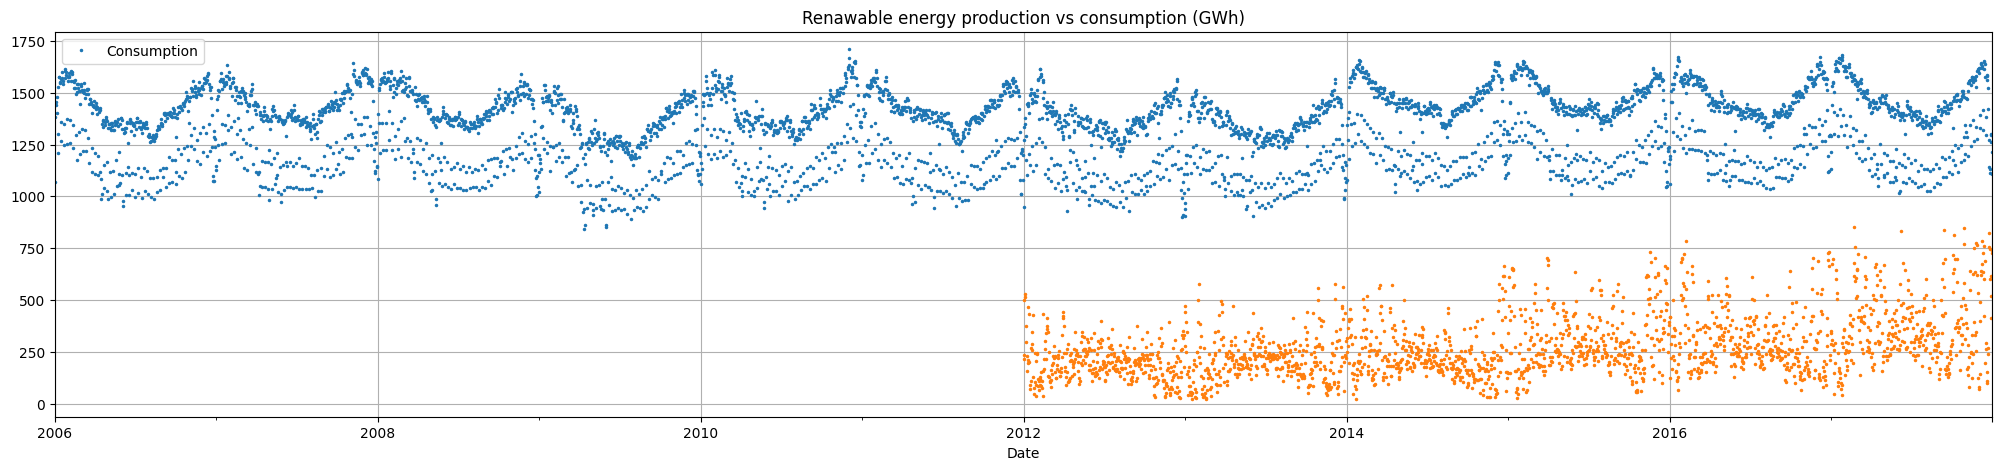

In [15]:
df['Consumption'].plot(figsize=(25, 5),
                        title='Renawable energy production vs consumption (GWh)',
                        marker='.',
                        markersize=3,
                        linestyle='',
                        grid=True)

pd.Series(df['Solar'] + df['Wind']).plot(figsize=(25, 5),
                        title='Renawable energy production vs consumption (GWh)',
                        marker='.',
                        markersize=3,
                        linestyle='',
                        grid=True)
plt.legend()

Yearly trend of production / consuption ratio

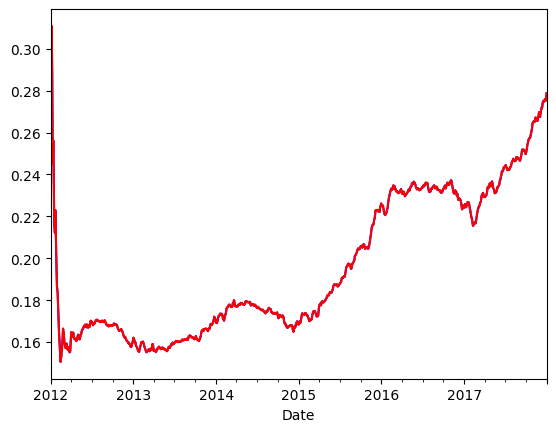

In [13]:
import matplotlib.pyplot as plt
df['ratio'] = (df['Solar'] + df['Wind']) / df['Consumption']
df['ratio']['2012':].fillna(0).rolling('365D').mean().plot(label='Yearly rolling mean', color='blue')
df['ratio']['2012':].fillna(0).rolling(365, min_periods=1).mean().plot(label='Yearly rolling mean', color='red')
plt.show()

### Exercise 2

Analyse the trend in solar energy production starting from $2012$.

Compare, starting from $2006$, the trends in

* solar energy production
* wind energy production
* total production of renewable energy.

In [2]:
df.head()

,Consumption,Wind,Solar
Date,,,
2006-01-01,1069.184,NaN,NaN
2006-01-02,1380.521,NaN,NaN
2006-01-03,1442.533,NaN,NaN
2006-01-04,1457.217,NaN,NaN
2006-01-05,1477.131,NaN,NaN


<AxesSubplot: title={'center': 'Renawable energy production vs consumption (GWh)'}, xlabel='Date'>

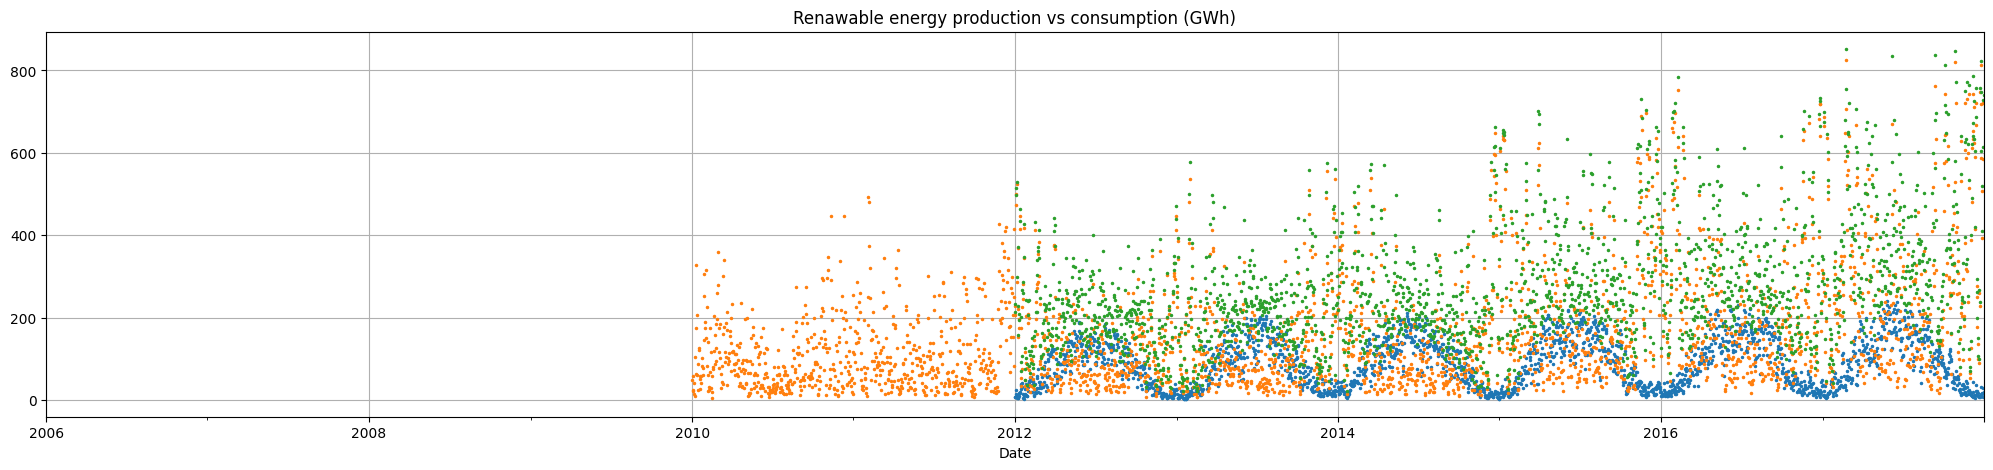

In [16]:
df['Solar'].plot(figsize=(25, 5),
                        title='Solarenergy production (GWh)',
                        marker='.',
                        markersize=3,
                        linestyle='',
                        grid=True)
df['Wind'].plot(figsize=(25, 5),
                        title='Wind energy production(GWh)',
                        marker='.',
                        markersize=3,
                        linestyle='',
                        grid=True)
pd.Series(df['Solar'] + df['Wind']).plot(figsize=(25, 5),
                        title='Renawable energy production vs consumption (GWh)',
                        marker='.',
                        markersize=3,
                        linestyle='',
                        grid=True)

### Exercise 3

Import and plot the time series [`alcohol_sales`](datasets/alcohol_sales.csv).

1. Find the series decomposition.
2. Plot the components and try to describe them
3. Analyse residual distribution and try to find out if they follow a normal, etc.

In [31]:
alchol = pd.read_csv('datasets/alcohol_sales.csv', parse_dates=True)
alchol['Date'] = pd.to_datetime(alchol['Date']) 
alchol.set_index('Date', inplace=True)
alchol.fillna(method='ffill', inplace=True)

In [32]:
alchol.head()

,Sales
Date,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


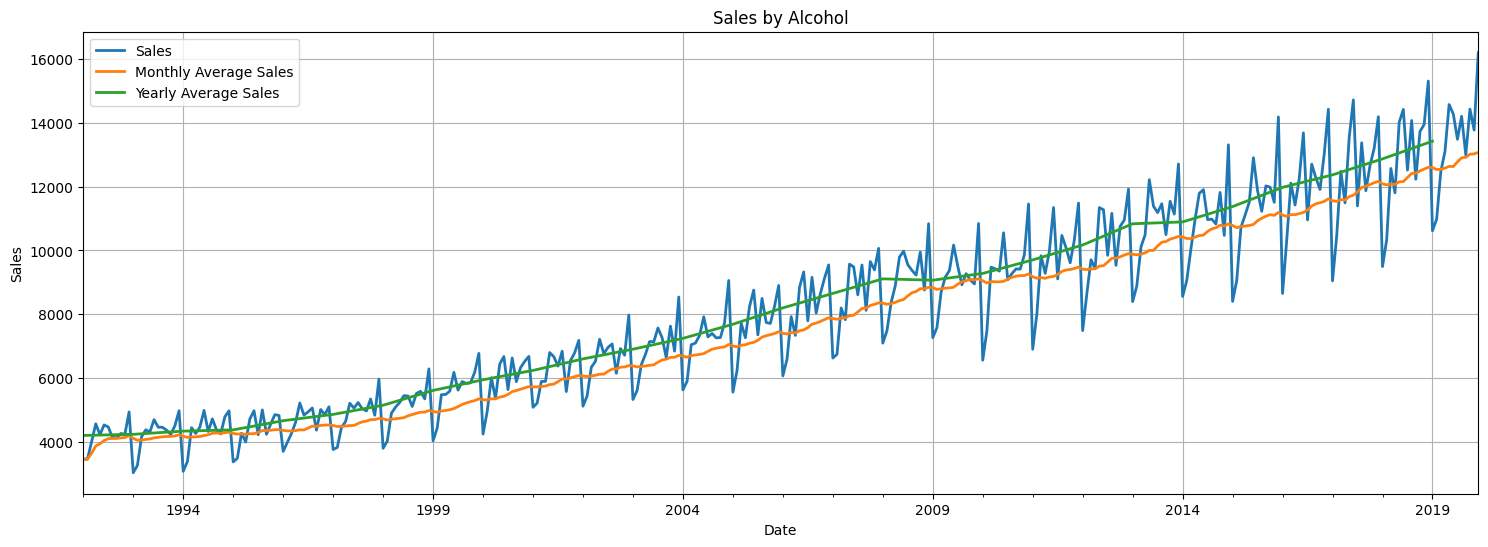

In [49]:
alchol['Sales'].plot(figsize=(18,6),
                      title='Sales by Alcohol',
                      fontsize=10,
                      xlabel='Date',
                      ylabel='Sales',
                      grid=True,
                      linewidth=2,

)
alchol['Sales'].rolling(30, min_periods=1).mean().plot(figsize=(18,6),
                                                        title='Sales by Alcohol',
                                                        fontsize=10,
                                                        xlabel='Date',
                                                        ylabel='Monthly Average Sales',
                                                        grid=True,
                                                        linewidth=2,

)
alchol['Sales'].resample('Y', label='right').mean().plot(figsize=(18,6),
                                        title='Sales by Alcohol',
                                        fontsize=10,
                                        xlabel='Date',
                                        ylabel='Sales',
                                        grid=True,
                                        linewidth=2,

)
plt.legend(['Sales', 'Monthly Average Sales', 'Yearly Average Sales'], loc='best', fontsize=10)
plt.show()

<AxesSubplot: title={'center': 'Sales by Alcohol'}, xlabel='Date', ylabel='Sales'>

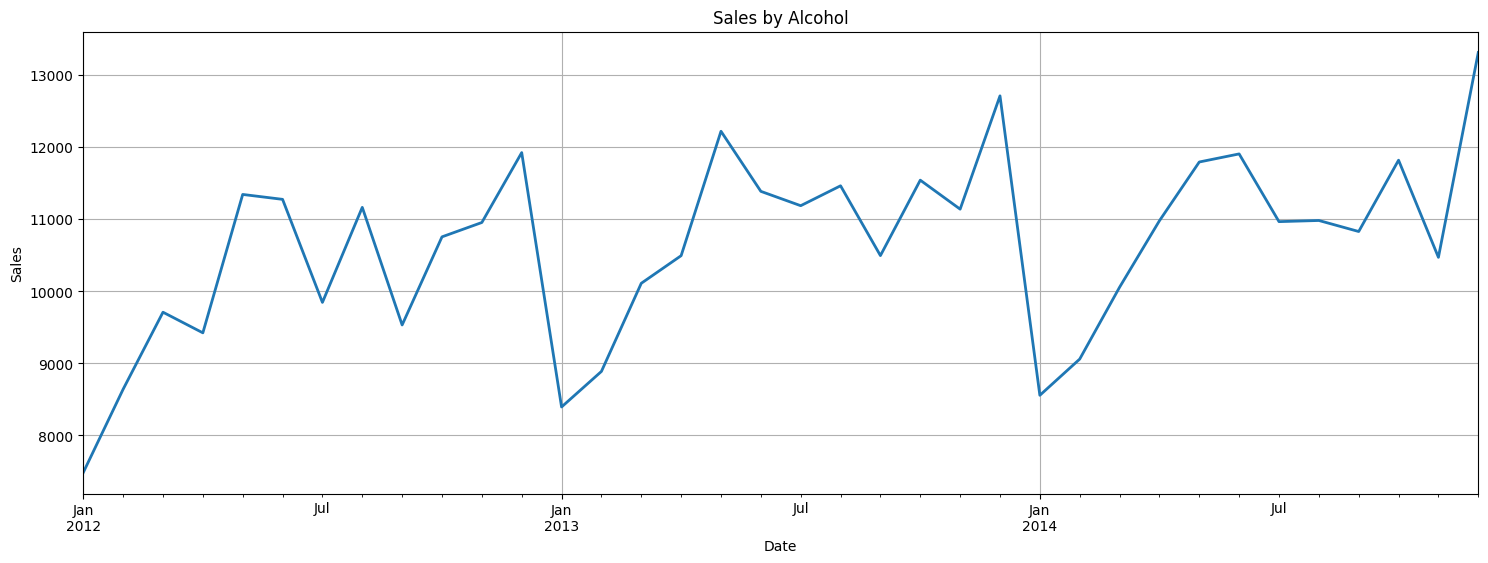

In [51]:
alchol['Sales']['2012':'2014'].plot(figsize=(18,6),
                      title='Sales by Alcohol',
                      fontsize=10,
                      xlabel='Date',
                      ylabel='Sales',
                      grid=True,
                      linewidth=2,

)

So a yearly seasonality

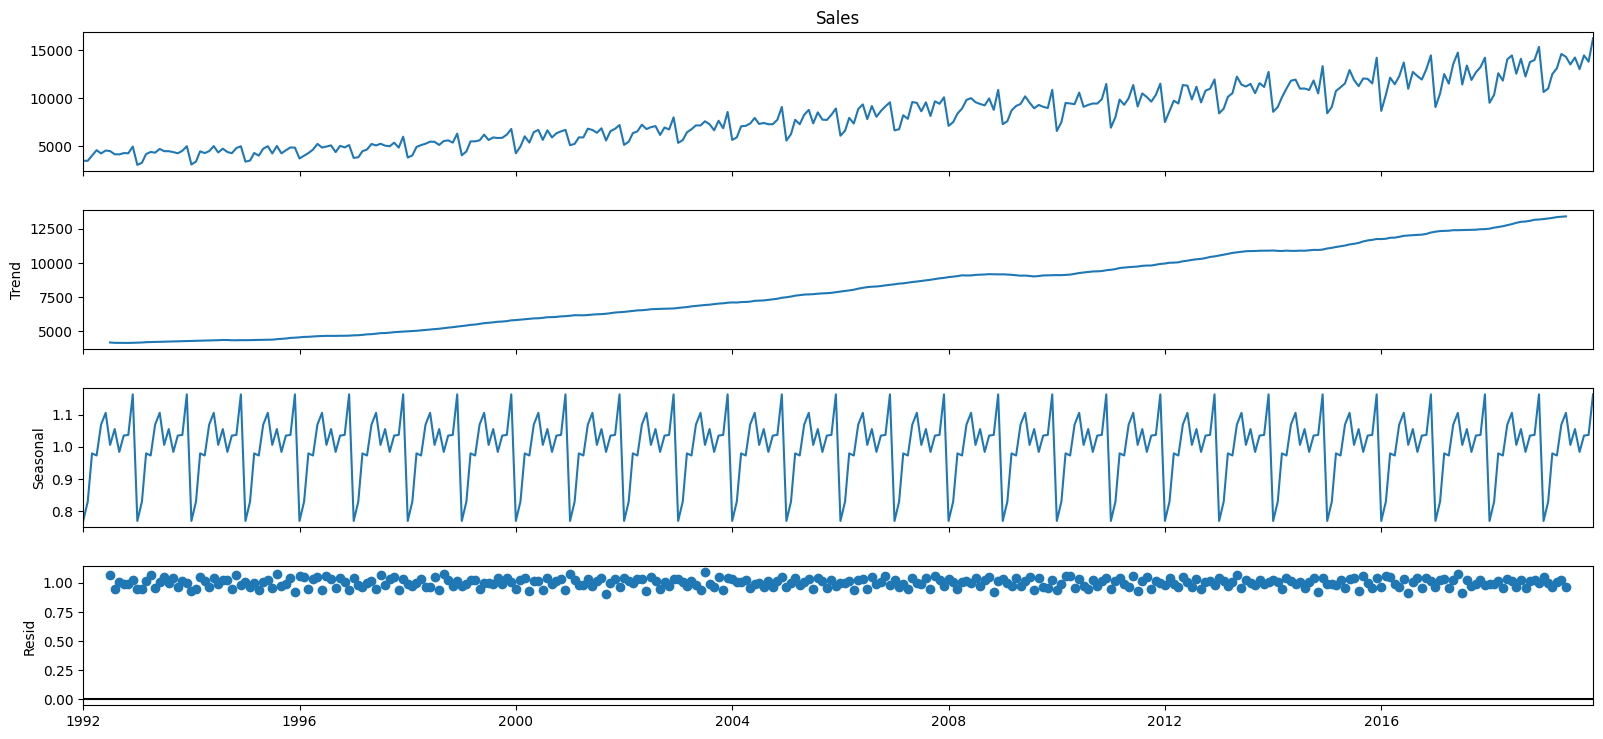

In [61]:
# Import packages
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Plot the decomposition for multiplicative series
decomposition_plot_multi = seasonal_decompose(alchol['Sales'],
                                              model='multiplicative')
decomposition_plot_multi.plot().set_size_inches((18, 8))
plt.show()

### Exercise 4

Import and plot the time series [`co2-ppm`]('https://pkgstore.datahub.io/core/co2-ppm-daily/co2-ppm-daily_csv/data/f2f91444294eec9f764430483fafc6be/co2-ppm-daily_csv.csv'). 

1. Try to plot the series and decompose it.
2. Find the distribution of the residual part. Does it follow a Gaussian curve?

### Exercise 5
Forecast and represent the solar energy production of $2017$, by using years from $2012$ to $2016$ as training data. 

You should use at least 2 different models and compare results.

### Exercise 6

Import, plot and analyse the time series of [Italian covid cases](https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv).

1. Try to plot at normal and log scales the new cases, hospitalised and deaths. What can you say?
2. Find the _lag of maximum correlation_ between the series of new cases and deaths to determine how delayed is one curve with respect to the other.
3. Taking a forecast window of 3 weeks, try to forecast the new cases tomorrow. Think of what metric is the most suitable to use.